##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


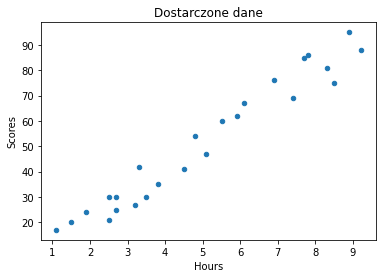

Coef: [[9.71054094]],
Intercept: [2.79419668]
Intercept to współczynnik Beta0 a Coef to współczynnik Beta1.

Porównanie Predykcji z prawdziwymi wynikami
predictions: [[83.39168645]
 [27.07054902]
 [27.07054902]
 [69.79692914]
 [60.0863882 ]
 [29.0126572 ]
 [34.83898177]
 [52.31795545]]

real results: [[81]
 [30]
 [21]
 [76]
 [62]
 [25]
 [42]
 [47]]


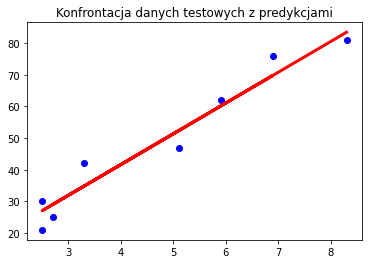


Dokładność dla danych testowych z pomocą dwóch metryk
MAE:  4.499999999999998
MSE:  23.61945761415174
RMSE:  4.859985351228103


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv('SCORES.csv')
print(df.head())

df.plot.scatter(x='Hours', y='Scores')
plt.title('Dostarczone dane')
plt.show()


X = df['Hours']
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

reg = LinearRegression().fit(X_train, y_train)
print(f'Coef: {reg.coef_},\nIntercept: {reg.intercept_}')
print('Intercept to współczynnik Beta0 a Coef to współczynnik Beta1.')

y_hat = reg.predict(X_test)

print('\nPorównanie Predykcji z prawdziwymi wynikami')
print(f'predictions: {y_hat}')
print(f'\nreal results: {y_test}')

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_hat, color="red", linewidth=3)
plt.title('Konfrontacja danych testowych z predykcjami')
plt.show()

print('\nDokładność dla danych testowych z pomocą dwóch metryk')
print('MAE: ', metrics.mean_absolute_error(y_test, y_hat))
print('MSE: ', metrics.mean_squared_error(y_test, y_hat))
print('RMSE: ', metrics.mean_squared_error(y_test, y_hat, squared=False))

   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132


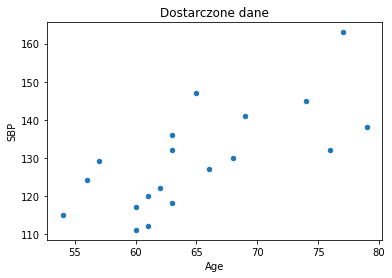

Coef: [[1.44882707]],
Intercept: [36.17936475]
Intercept to współczynnik Beta0 a Coef to współczynnik Beta1.

Porównanie Predykcji z prawdziwymi wynikami
predictions: [[123.108989  ]
 [134.69960556]
 [146.29022213]
 [124.55781607]
 [127.45547021]
 [136.14843263]]

real results: [[117]
 [130]
 [132]
 [120]
 [136]
 [141]]


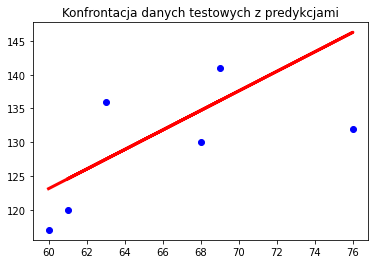


Dokładność dla danych testowych z pomocą dwóch metryk
MAE:  7.175454985814118
MSE:  63.48947834957039
RMSE:  7.968028510840708


In [161]:
df = pd.read_csv('SBP.csv')
print(df.head())

df.plot.scatter(x='Age', y='SBP')
plt.title('Dostarczone dane')
plt.show()


X = df['Age']
y = df['SBP']

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

reg = LinearRegression().fit(X_train, y_train)
print(f'Coef: {reg.coef_},\nIntercept: {reg.intercept_}')
print('Intercept to współczynnik Beta0 a Coef to współczynnik Beta1.')

y_hat = reg.predict(X_test)

print('\nPorównanie Predykcji z prawdziwymi wynikami')
print(f'predictions: {y_hat}')
print(f'\nreal results: {y_test}')

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_hat, color="red", linewidth=3)
plt.title('Konfrontacja danych testowych z predykcjami')
plt.show()

print('\nDokładność dla danych testowych z pomocą dwóch metryk')
print('MAE: ', metrics.mean_absolute_error(y_test, y_hat))
print('MSE: ', metrics.mean_squared_error(y_test, y_hat))
print('RMSE: ', metrics.mean_squared_error(y_test, y_hat, squared=False))

## Wnioski: Dla drugiego problemu uzyskujemy znacznie gorsze wyniki. Jest to spowodowane tym, że problem jest mniej liniowy, tzn. rzeczywiste wyniki nie zależą aż w tak liniowy sposób od parametrów wejściowych jak w przypadku pierwszego zagadanienia. Dlatego też wyniki (MAE, MSE, RMSE) są większe a na wykresie widać większe rozbieżności pomiędzy wartościami przewidzonymi a prawdziwiymi.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [162]:
df = pd.read_csv('PETROL.csv')
print('Dostarczone dane:')
print(df.head())


X = df[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']]
y = df['Zuzycie_paliwa']

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
print(f'Coef: {reg.coef_},\nIntercept: {reg.intercept_}')
print('Intercept to współczynnik Beta0 a Coef to współczynnik Beta1.')

y_hat = reg.predict(X_test)

print('\nPorównanie Predykcji z prawdziwymi wynikami')
print(f'predictions: {y_hat}')
print(f'\nreal results: {y_test}')


print('\nDokładność dla danych testowych z pomocą dwóch metryk')
print('MAE: ', metrics.mean_absolute_error(y_test, y_hat))
print('MSE: ', metrics.mean_squared_error(y_test, y_hat))
print('RMSE: ', metrics.mean_squared_error(y_test, y_hat, squared=False))

Dostarczone dane:
   Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.0             3571                   1976   
1               9.0             4092                   1250   
2               9.0             3865                   1586   
3               7.5             4870                   2351   
4               8.0             4399                    431   

   Procent_ludnosci_z_prawem_jazdy  Zuzycie_paliwa  
0                            0.525             541  
1                            0.572             524  
2                            0.580             561  
3                            0.529             414  
4                            0.544             410  
Coef: [-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03],
Intercept: 513.1398382048233
Intercept to współczynnik Beta0 a Coef to współczynnik Beta1.

Porównanie Predykcji z prawdziwymi wynikami
predictions: [594.68473673 657.94626287 578.77796233 577.56584838 524.600507

## Wnioski: Z jednej strony wyniki są prawie 10 razy gorsze niż dla poprzedniego zagadnienia. Z drugiej strony, można powiedzieć, że mimo wszystko oddają one jakoś rzeczywistość. Można więc powiedzieć, że wyniki są akceptowalne, ponieważ człowiekowi ciężko byłoby przewidzieć wyniki dla aż 5 zmiennych. Przechodząć do rzeczy, które mogły mieć negatywny wpływ na wynik, warto na pewno wymienić ilość zmiennych. Dużo ciężej dopasować wynik gdy aż tyle czynników na niego wpływa. Z drugiej strony dobrze byłoby jakoś znormalizować zmienne wejściowe, na przykład aby wszystkie były z przedziału (0, 1) ponieważ teraz różne zmienne mogą mieć różny wpłw na wynik.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [163]:
df = pd.read_csv('HEART.csv')
print('Dostarczone dane:')
print(df.head())
print("\nStatystki powyższych danych:")
print(df.describe())

Dostarczone dane:
   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  

Statystki powyższych danych:
              age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    

In [164]:
#1
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

#2
df = pd.read_csv('HEART.csv')

#3
df.replace("?", np.nan, inplace=True)
df.drop(columns=["slope", "ca", "thal"], axis=1, inplace=True)
df.dropna(inplace=True)

#4
for column in ['cp', 'restecg']:
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column])

#5
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)
#y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

#6
reg = LogisticRegression(max_iter=2000).fit(X_train, y_train)

scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler1.transform(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_train)
X_test_scaled = scaler2.transform(X_test)
reg_scaled = LogisticRegression(max_iter=2000).fit(X_train_scaled, y_train)

X_train_std = preprocessing.normalize(X_train, axis=1, copy=False)
X_test_std = preprocessing.normalize(X_test, axis=1, copy=True)
reg_std = LogisticRegression(max_iter=2000).fit(X_train_std, y_train)

print('\nDokładność dla danych testowych z pomocą dwóch metryk')
print("Nieustandaryzowane: ", reg.score(X_test, y_test))
print("Ustandaryzowane: ", reg_scaled.score(X_test_scaled, y_test))
print("Ustandaryzowane 2: ", reg_std.score(X_test_std, y_test))



Dokładność dla danych testowych z pomocą dwóch metryk
Nieustandaryzowane:  0.8490566037735849
Ustandaryzowane:  0.8301886792452831
Ustandaryzowane 2:  0.660377358490566


### Wnioski: Wyniki są zadowalające, około 85% przypadków jest dobrze klasyfikowanych. Niestety standaryzacja nie poprawiła wyniku.